In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import plotter as p
import jupyter as j
import plotter3 as p3
import importlib
importlib.reload(p)
importlib.reload(j)
importlib.reload(p3)

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/nokia_vodacom/centurycity/quectel/']

custom jupyter @DanielRobinson


In [12]:
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')
# htest = [[]*len(mdb)]
# huenw = [[]*len(mdb[0])]
# hatt = [[]*len(mdb[0][0])]
cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown', 'tab:cyan']

In [57]:
importlib.reload(p)
importlib.reload(j)
files = [['release/release0/*', 'release/release1/*','release/release16/*'],['release/release64/*','release/release128/*'],['release/release256/*','release/release512/*']]
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*'])#, 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
dirrs = ['logs/zte_mtn/rf_shield/quectel/', 'logs/zte_mtn/rf_shield/ublox/','logs/nokia_vodacom/centurycity/quectel/', 'logs/nokia_vodacom/centurycity/ublox/']
# atd = p.attdt()
mdb = []
for f in files:
    atd = p.scatternuator('energy_snr_zte_log' + 'ky', 'kx', 'ky', 'thresh', [None]*4, 'scale', 'limited', dirrs, f, mean=True, ttype='return')
    mdb.append(atd)

custom jupyter @DanielRobinson


custom jupyter @DanielRobinson
7 4 5


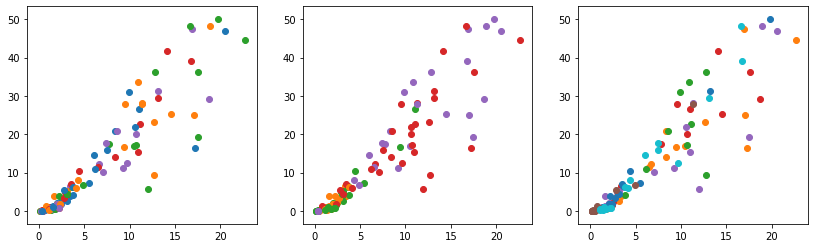

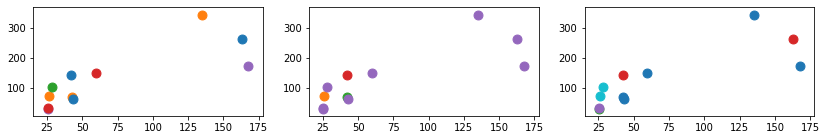

In [81]:
ky = 'energy'
kx = 'txTime'
hytest = []
hyuenw = []
hyatt = []
hxtest = []
hxuenw = []
hxatt = []
invert = [True, False]
scale = [1000, 1000]
importlib.reload(p)
importlib.reload(j)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
fig = plt.figure(figsize=(14, 2))
ax4 = fig.add_subplot(131)
ax5 = fig.add_subplot(132)
ax6 = fig.add_subplot(133)
for ti, test in enumerate(mdb):
    hytest.append([])
    hxtest.append([])
    for ui, uenw in enumerate(test):
        if not ti:
            hyuenw.append([])
            hxuenw.append([])
        for ai, att in enumerate(uenw):
            if not ti:
                hyatt.append([])
                hxatt.append([])
            for atd in [uenw[att]]:
                try:
                    try:
                        # main
                        rx = j.threshold(atd, kx)
                        ry = j.threshold(atd, ky)
                        r = rx * ry
                        x = np.array(atd[kx][r])/scale[0]
                        y = np.array(atd[ky][r])/scale[1]
                        ax1.scatter(x, y, color=cc[ai])
                        ax2.scatter(x, y, color=cc[ui])
                        ax3.scatter(x, y, color=cc[ti])
                        if y.size:
                            hy = np.mean(y)
                            hytest[ti].append(hy)
                            hyuenw[ui].append(hy)
                            hyatt[ai].append(hy)
                        if x.size:
                            hx = np.mean(x)
                            hxtest[ti].append(hx)
                            hxuenw[ui].append(hx)
                            hxatt[ai].append(hx)
                        
                        # outliers
                        rx = np.invert(rx) if invert[0] else rx
                        ry = np.invert(ry) if invert[1] else ry
                        r = rx * ry
                        x = np.array(atd[kx][r])/scale[0]
                        y = np.array(atd[ky][r])/scale[1]
                        ms=80
                        ax4.scatter(x, y, color=cc[ai], s=ms)
                        ax5.scatter(x, y, color=cc[ui], s=ms)
                        ax6.scatter(x, y, color=cc[ti], s=ms)
                    except TypeError as e:
                        print(e, atd[kx])
                except (KeyError, TypeError) as e:
                    pass
                
print(ti+1, ui+1, ai+1)

ky energy


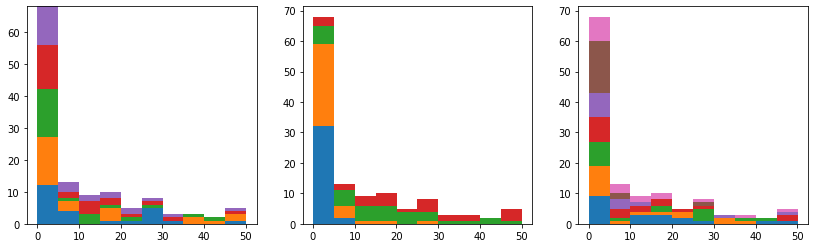

kx txTime



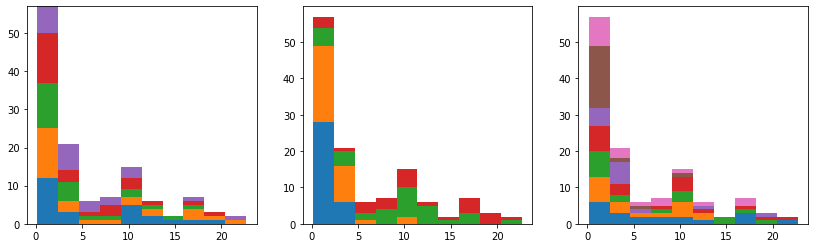

In [84]:
print('ky', ky)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(hyatt, stacked=True)
ax2.hist(hyuenw, stacked=True)
ax3.hist(hytest, stacked=True)
plt.show()
print('kx', kx)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(hxatt, stacked=True)
ax2.hist(hxuenw, stacked=True)
ax3.hist(hxtest, stacked=True)

custom jupyter @DanielRobinson
7 4 5


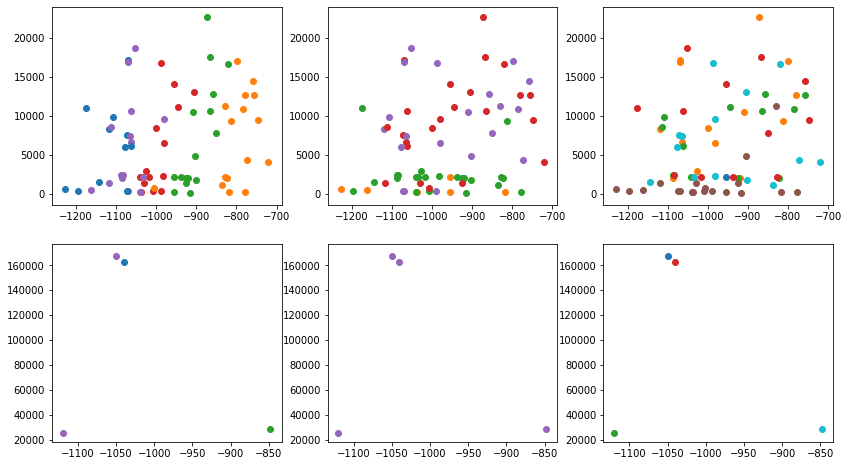

In [80]:
ky = 'txTime'
kx = 'Signal power'
invert = [False, True]
importlib.reload(p)
importlib.reload(j)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
for ti, test in enumerate(mdb):
    for ui, uenw in enumerate(test):
        for ai, att in enumerate(uenw):
            for atd in [uenw[att]]:
                try:
                    try:
                        # main
                        rx = j.threshold(atd, kx)
                        ry = j.threshold(atd, ky)
                        r = rx * ry
                        x = atd[kx][r]
                        y = atd[ky][r]
                        ax1.scatter(x, y, color=cc[ai])
                        ax2.scatter(x, y, color=cc[ui])
                        ax3.scatter(x, y, color=cc[ti])
                        
                        # outliers
                        rx = np.invert(rx) if invert[0] else rx
                        ry = np.invert(ry) if invert[1] else ry
                        r = rx * ry
                        x = atd[kx][r]
                        y = atd[ky][r]
                        ax4.scatter(x, y, color=cc[ai])
                        ax5.scatter(x, y, color=cc[ui])
                        ax6.scatter(x, y, color=cc[ti])
                    except TypeError as e:
                        print(e, atd[kx])
                except (KeyError, TypeError) as e:
                    pass
                
print(ti+1, ui+1, ai+1)

custom jupyter @DanielRobinson


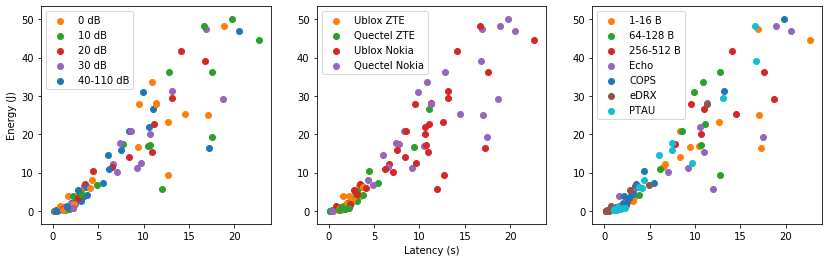

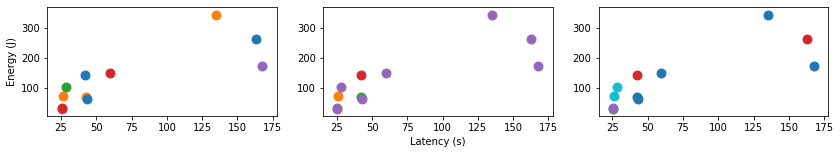

7 4 5
ky energy


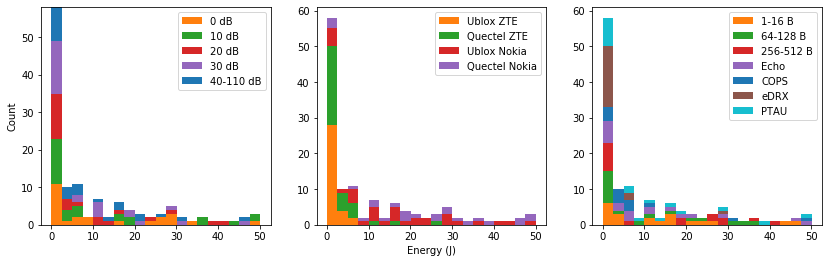

kx txTime


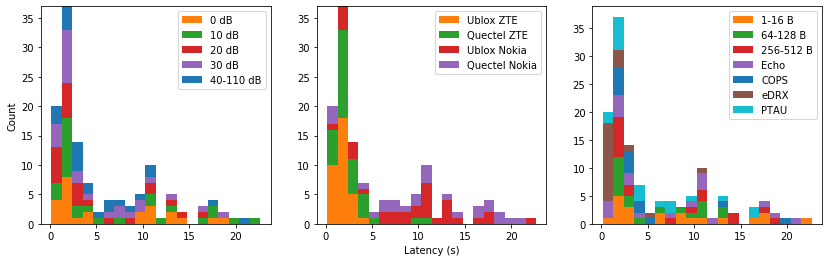

In [80]:
importlib.reload(p3)
p3.plot(mdb, 'txTime', 'energy', 'Latency (s)', 'Energy (J)', [1000,1000], [True, False])
p3.hist(True)

custom jupyter @DanielRobinson
'int' object is not subscriptable -1640


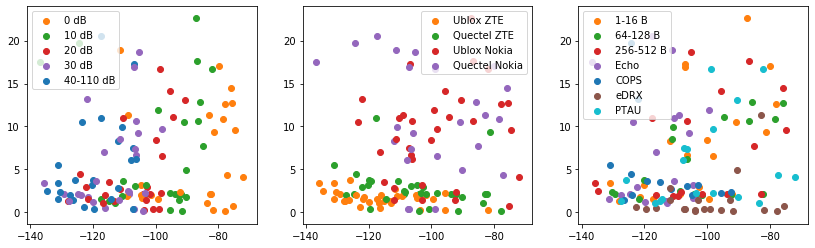

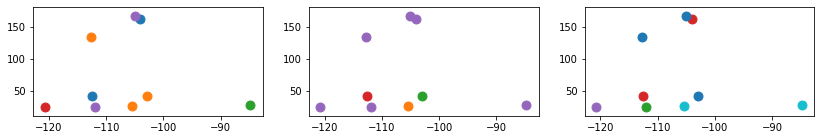

7 4 5
ky txTime


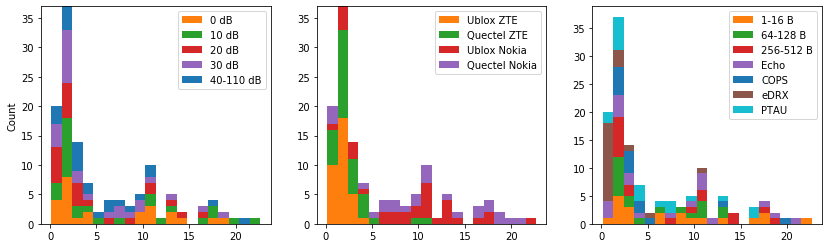

In [79]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'txTime', scale=[10,1000], invert=[False, True])
p3.hist()

custom jupyter @DanielRobinson
'int' object is not subscriptable -1640
'int' object is not subscriptable -829.3


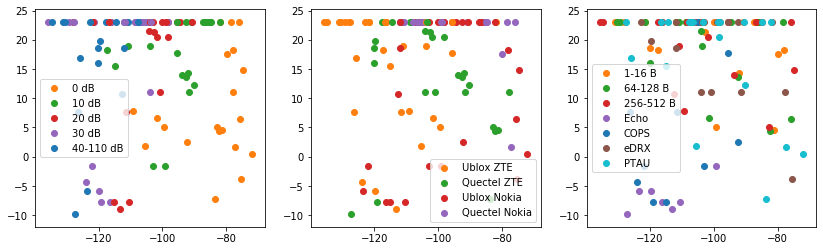

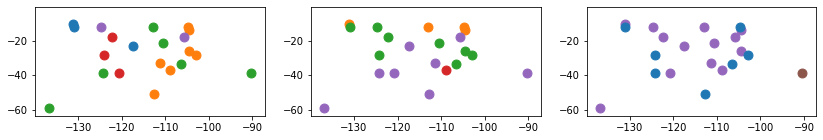

7 4 5


In [58]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'TX power', scale=[10,10], invert=[False, True])

ky TX power


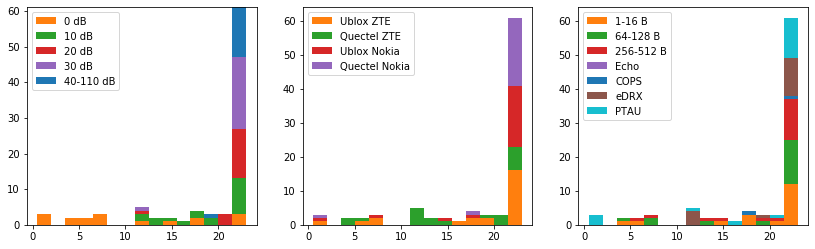

kx Signal power


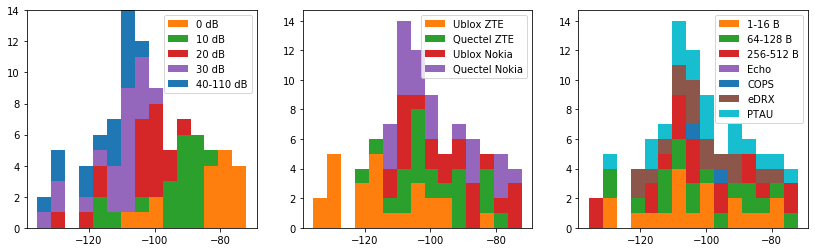

In [55]:
importlib.reload(p3)
p3.hist(True, bins=15)

In [25]:
plt.legend?

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will 

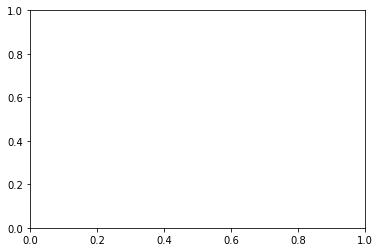

Signature: fig.savefig(fname, *, transparent=None, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or PathLike or file-like object
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is not set, then the output format is inferred from
    the extension of *fname*, if any, and from :rc:`savefig.format`
    otherwise.  If *format* is set, it determines the output format.

    Hence, if *fname* is not a path or has no extension, remember to
    specify *format* to ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.savefig?